# Вариант 11
## Егоров Алексей БПМ214

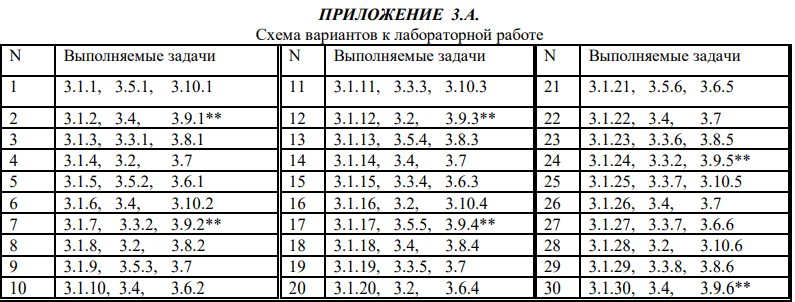

In [197]:
import numpy as np
import matplotlib.pyplot as plt

### 3.1.11

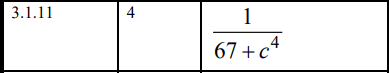

In [198]:
#1
N = 11
b = np.array([N] * 4, float)
A = np.empty((4, 4))
for i in range(0, 4):
    for j in range(0, 4):
        A[i, j] = 1 / (67 + (0.1 * N * (i + 1) * (j + 1) ** 4))
x_exact = np.linalg.solve(A, b)
print(f'Точное решение: {x_exact}')

Точное решение: [  937.99076076  -461.25619644   891.8615313  -1057.97452575]


In [199]:
#2
cond = np.linalg.cond(A, np.inf)
print(f'Число обусловленности матрицы A по бесконечной норме: {cond}')

Число обусловленности матрицы A по бесконечной норме: 6218.17835037199


In [200]:
delta = 0.05
b_i = np.repeat(b, 4).reshape(4, 4)
np.fill_diagonal(b_i, N+delta)
b_i

array([[11.05, 11.  , 11.  , 11.  ],
       [11.  , 11.05, 11.  , 11.  ],
       [11.  , 11.  , 11.05, 11.  ],
       [11.  , 11.  , 11.  , 11.05]])

In [201]:
#3
ds = []
for i, x in enumerate(x_exact):
    x_i = np.linalg.solve(A, b_i[i])
    ds.append(np.max(np.abs(x_exact-x_i))/np.max(np.abs(x_exact)))
print(f'Вектор d имеет вид: {ds}')

Вектор d имеет вид: [0.39496934502798686, 2.284765975136335, 3.709477884171418, 1.8242267086085286]


Text(0, 0.5, 'dm')

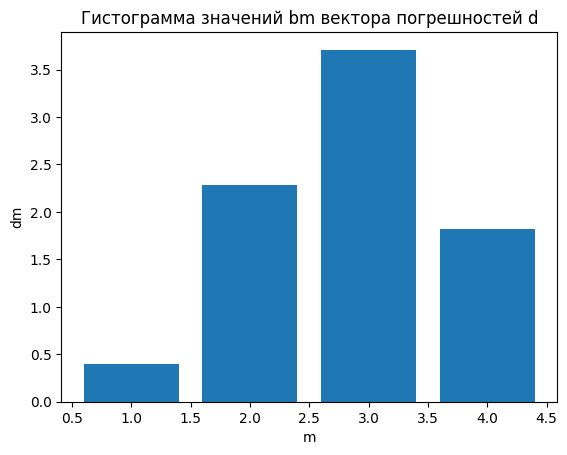

In [202]:
plt.bar(np.arange(1, 5),  ds)
plt.title('Гистограмма значений bm вектора погрешностей d')
plt.xlabel('m')
plt.ylabel('dm')

Наибольшее влияние на погрешность решения уравнения Ax=b оказывает 3я компонента вектора d

In [203]:
delta_b = np.abs(delta) / np.linalg.norm(b_i[0], ord=np.inf)
delta_teor = cond * delta_b
print(f'Относительная погрешность x_m <= {delta_teor}')

Относительная погрешность x_m <= 28.13655362159271


### 3.3.3

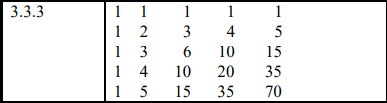

In [129]:
A = [[1, 1, 1, 1, 1], [1, 2, 3, 4, 5], [1, 3, 6, 10, 15], [1, 4, 10, 20, 35], [1, 5, 15, 35, 70]]
b = np.eye(5)

In [130]:
cond2 = np.linalg.cond(A)
cond_inf = np.linalg.cond(A, np.inf)

In [131]:
x_i = []
for i in range(5):
    x_i.append(np.linalg.solve(A, b[i]))
x_i

[array([  5., -10.,  10.,  -5.,   1.]),
 array([-10.,  30., -35.,  19.,  -4.]),
 array([ 10., -35.,  46., -27.,   6.]),
 array([ -5.,  19., -27.,  17.,  -4.]),
 array([ 1., -4.,  6., -4.,  1.])]

In [132]:
A_rev2 = np.max([np.linalg.norm(x_i[i]) / np.linalg.norm(b[i]) for i in range(5)])
A_norm2 = np.linalg.norm(A)
cond_A2 = A_norm2 * A_rev2
print(f'Для нормы в R^2: число обусловленности A наст.: {cond2}\t число обусловленности A вычисл: {cond_A2}')

Для нормы в R^2: число обусловленности A наст.: 8517.524361138292	 число обусловленности A вычисл: 5996.423434014646


### 3.10.3

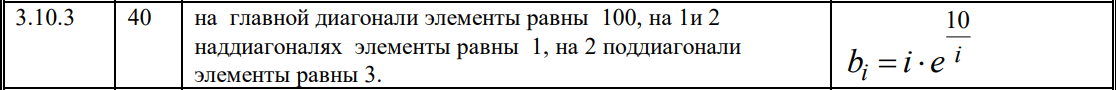

In [214]:
n = 40
A = A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            A[i][j] = 100
        if i + 1 == j:
            A[i][j] = 1
        if i + 2 == j:
            A[i][j] = 1
        if i == j + 2:
            A[i][j] = 3
print(f'Матрица А = {A}')

Матрица А = [[100.   1.   1. ...   0.   0.   0.]
 [  0. 100.   1. ...   0.   0.   0.]
 [  3.   0. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.   1.   1.]
 [  0.   0.   0. ...   0. 100.   1.]
 [  0.   0.   0. ...   3.   0. 100.]]


In [217]:
A

array([[100.,   1.,   1., ...,   0.,   0.,   0.],
       [  0., 100.,   1., ...,   0.,   0.,   0.],
       [  3.,   0., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100.,   1.,   1.],
       [  0.,   0.,   0., ...,   0., 100.,   1.],
       [  0.,   0.,   0., ...,   3.,   0., 100.]])

In [215]:
b = [i * np.exp(10 / i) for i in range(1, n + 1)]
print(f'Правая часть b =  {b}')

Правая часть b =  [22026.465794806718, 296.8263182051532, 84.09487468357841, 48.72997584281389, 36.945280494653254, 31.766940302820178, 29.209137185186673, 27.92274365969473, 27.339585997657345, 27.18281828459045, 27.302715930853132, 27.6117106907139, 28.055371941329796, 28.598178983725987, 29.216010615820135, 29.891935318915557, 30.613731133858764, 31.372361975402242, 32.16100740621027, 32.97442541400257, 33.80852244041966, 34.660056274587, 35.52642638017902, 36.40552311331712, 37.29561744103176, 38.19527904007443, 39.103314623377436, 40.018720907703376, 40.940648329345144, 41.86837275258269, 42.801273193048516, 43.73881411756148, 44.680531261574025, 45.62602017601793, 46.57492691065725, 47.52694038362833, 48.481786092019206, 49.43922089669274, 50.39902867347402, 51.36101666750966]


In [193]:
def thomas_algorithm(A, b):
    n = len(b)
    a = np.zeros(n-1)
    c = np.zeros(n-1)
    d = np.zeros(n)
    e = np.zeros(n-2)
    f = np.zeros(n-2)
    
    for i in range(n):
        d[i] = A[i][i]
        if i < n-1:
            a[i] = A[i+1][i]
            c[i] = A[i][i+1]
        if i < n-2:
            e[i] = A[i][i+2]
            f[i] = A[i+2][i]
    
    c_ = np.zeros(n-1)
    e_ = np.zeros(n-2)
    f_ = np.zeros(n)
    #прямая прогонка
    c_[0] = c[0] / d[0]
    e_[0] = e[0] / d[0]
    f_[0] = b[0] / d[0]
    for i in range(1, n-1):
        temp = d[i] - a[i-1]*c_[i-1]
        if i > 1:
            temp -= f[i-2]*e_[i-2]
        c_[i] = c[i] / temp
        if i < n-2:
            e_[i] = e[i] / temp
        f_[i] = (b[i] - a[i-1]*f_[i-1]) / temp
    
    if n > 2:
        f_[-1] = (b[-1] - a[-1]*f_[-2] - f[-1]*f_[-3]) / (d[-1] - a[-1]*c_[-2] - e[-1]*e_[-3])
    else:
        f_[-1] = (b[-1] - a[-1]*f_[-2]) / (d[-1] - a[-1]*c_[-2])
    #обратная
    x = np.zeros(n)
    x[-1] = f_[-1]
    x[-2] = f_[-2] - c_[-2]*x[-1]
    
    for i in range(n-3, -1, -1):
        x[i] = f_[i] - c_[i]*x[i+1]
        if i < n-2:
            x[i] -= e_[i]*x[i+2]
    
    return x

In [195]:
xs = thomas_algorithm(A, b)
print(f'Вектор решения: {xs}')

Вектор решения: [220.2267791    2.95512876   0.83275598   0.48068668   0.36357279
   0.31215588   0.28675645   0.27396305   0.26813456   0.26652519
   0.26765132   0.27064589   0.27497033   0.2802734    0.28631668
   0.29293292   0.30000141   0.30743296   0.31516027   0.32313162
   0.33130665   0.33965338   0.34814619   0.35676428   0.3654906
   0.37431108   0.38321396   0.39218936   0.4012289    0.41032547
   0.41947295   0.42866606   0.43790024   0.4471715    0.4564769
   0.46581238   0.47512334   0.48455786   0.49915184   0.49882385]


In [216]:
xxx = np.linalg.solve(A, b)
xxx

array([220.29220714,   3.02215131,  -5.77707056,   0.38825807,
         0.53705099,   0.30066417,   0.27072876,   0.26502014,
         0.26008829,   0.25864875,   0.25992243,   0.26296056,
         0.26724767,   0.27246082,   0.27837698,   0.2848385 ,
         0.29173136,   0.29897103,   0.30649362,   0.31424993,
         0.32220149,   0.33031781,   0.33857438,   0.34695133,
         0.35543236,   0.36400395,   0.37265484,   0.38137555,
         0.39015806,   0.39899551,   0.40788204,   0.41681256,
         0.42578269,   0.43478858,   0.4438274 ,   0.45289673,
         0.46194208,   0.47095912,   0.48513721,   0.49948139])